In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/pintoza/Desktop/dev/data-science/sales_optimization/data/processed/df_processed.csv')

df.head()

,order_number,sales_channel,warehouse_code,procured_date,order_date,ship_date,delivery_date,sales_team_id,customer_id,store_id,product_id,order_quantity,discount_applied,unit_cost,unit_price
0,101,In-Store,4,2017-12-31,2018-05-31,2018-06-14,2018-06-19,6,15,259,12,5,0.075,1001,1963
1,102,Online,3,2017-12-31,2018-05-31,2018-06-22,2018-07-02,14,20,196,27,3,0.075,3349,3940
2,103,Distributor,4,2017-12-31,2018-05-31,2018-06-21,2018-07-01,21,16,213,16,1,0.050,781,1776
3,104,Wholesale,3,2017-12-31,2018-05-31,2018-06-02,2018-06-07,28,48,107,23,8,0.075,1465,2325
4,105,Distributor,3,2018-04-10,2018-05-31,2018-06-16,2018-06-26,22,49,111,26,8,0.100,1476,1822


warehouse_code
1     5557
2     3101
3    11351
4     5765
5     6572
6     3816
Name: order_quantity, dtype: int64


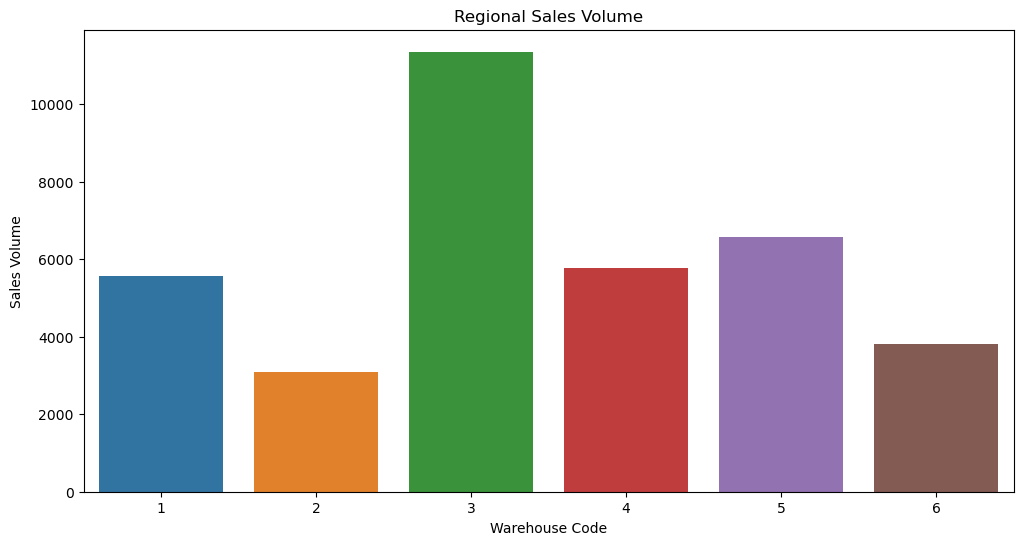

In [4]:
# Calculate metrics: Sales volume per warehouse
regional_sales_volume = df.groupby('warehouse_code')['order_quantity'].sum()
print(regional_sales_volume)

# Generate Bar Plot for Sales Volume per Warehouse
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_sales_volume.index, y=regional_sales_volume.values)
plt.title('Regional Sales Volume')
plt.xlabel('Warehouse Code')
plt.ylabel('Sales Volume')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/regional_analysis/regional_sales_volume.png')
plt.show()

# Metrics: Sales Volume per Warehouse

warehouse_code
1    831.136661
2    838.654124
3    863.021557
4    863.784980
5    849.394900
6    853.147025
Name: profit_margin, dtype: float64


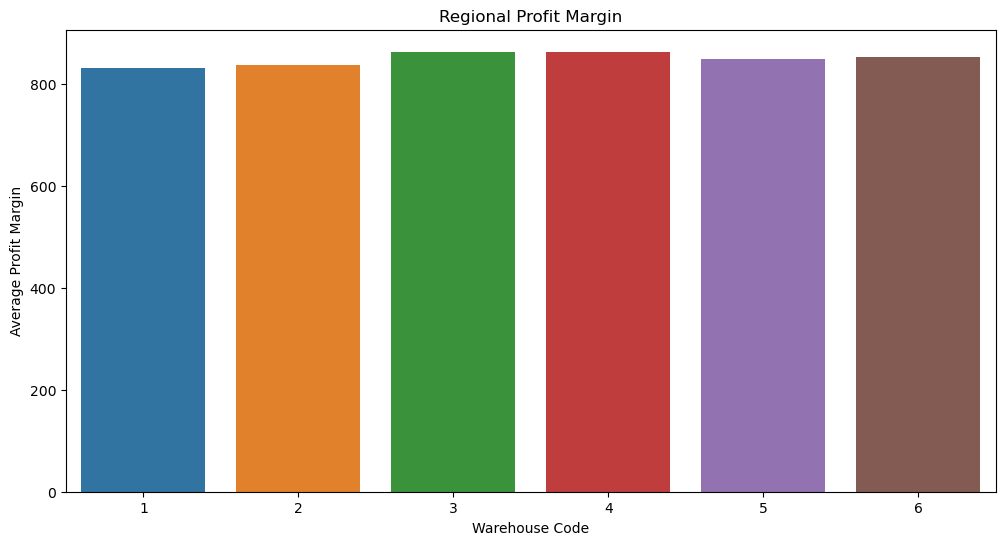

In [5]:
# Calculate metrics: Profit Margin per warehouse
df['profit_margin'] = df['unit_price'] - df['unit_cost']
regional_profit_margin = df.groupby('warehouse_code')['profit_margin'].mean()
print(regional_profit_margin)

# Generate Bar Plot for Profit Margin per Warehouse
plt.figure(figsize=(12, 6))
sns.barplot(x=regional_profit_margin.index, y=regional_profit_margin.values)
plt.title('Regional Profit Margin')
plt.xlabel('Warehouse Code')
plt.ylabel('Average Profit Margin')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/regional_analysis/regional_profit_margin.png')
plt.show()

# Metrics: Average Profit Margin per Warehouse

In [8]:
import scipy.stats as stats

# Perform ANOVA test for Regional Profit Margin
groups_profit_margin = [df['profit_margin'][df['warehouse_code'] == wc] for wc in df['warehouse_code'].unique()]
f_stat_profit, p_value_profit = stats.f_oneway(*groups_profit_margin)

# Check if p-value is less than 0.05 for significance
is_significant_profit = p_value_profit < 0.05
print(is_significant_profit)

False


warehouse_code
1    0.115569
2    0.116823
3    0.112804
4    0.115613
5    0.116954
6    0.109277
Name: discount_applied, dtype: float64


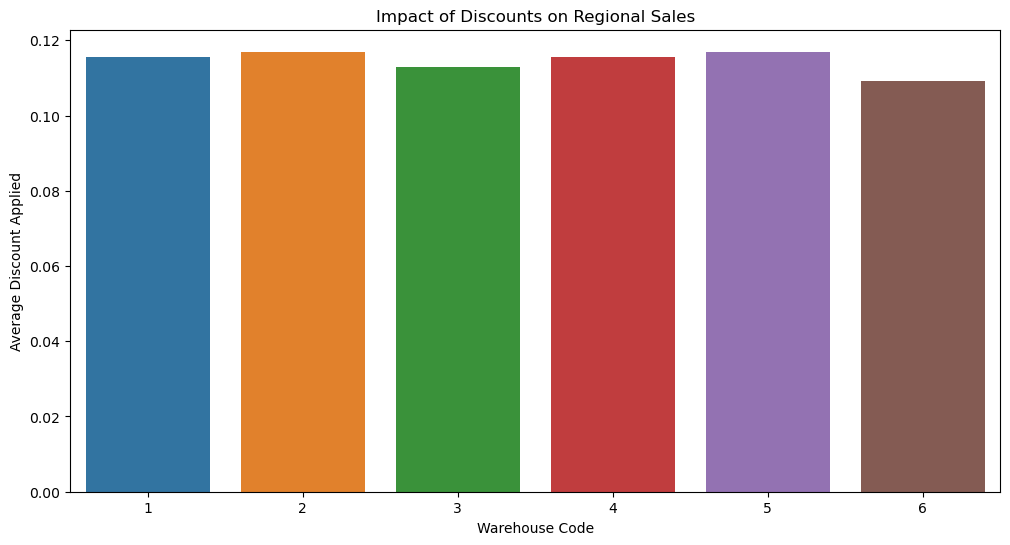

In [6]:
# Calculate metrics: Average discount applied per warehouse
avg_discount_per_warehouse = df.groupby('warehouse_code')['discount_applied'].mean()
print(avg_discount_per_warehouse)

# Generate Bar Plot for Impact of Discounts
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_discount_per_warehouse.index, y=avg_discount_per_warehouse.values)
plt.title('Impact of Discounts on Regional Sales')
plt.xlabel('Warehouse Code')
plt.ylabel('Average Discount Applied')
plt.savefig('/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/regional_analysis/regional_discount_impact.png')
plt.show()

# Metrics: Average Discount Applied per Warehouse

In [9]:
# Perform ANOVA test for Impact of Discounts
groups_discount = [df['discount_applied'][df['warehouse_code'] == wc] for wc in df['warehouse_code'].unique()]
f_stat_discount, p_value_discount = stats.f_oneway(*groups_discount)

# Check if p-value is less than 0.05 for significance
is_significant_discount = p_value_discount < 0.05
print(is_significant_discount)

False


In [10]:
from reportlab.lib.pagesizes import letter, landscape
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle, Paragraph, Image
from reportlab.lib.styles import getSampleStyleSheet

# Create a PDF file
pdf = SimpleDocTemplate(
    "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/insights/Regional_Analysis_Insights.pdf",
    pagesize=letter
)

# Set the styles
styles = getSampleStyleSheet()
styleN = styles["BodyText"]

# Add Title
elements = []
elements.append(Paragraph("Regional Analysis Insights", styles["Heading1"]))

# Insert insights text
insights_text = """
1. Regional Sales Volumes: <br/>
    - Regions handle varying sales volumes <br/>
   - warehouse_code: <br/>
    - 1:     5557 <br/>
    - 2:     3101 <br/>
    - 3:    11351 <br/>
    - 4:     5765 <br/>
    - 5:     6572 <br/>
    - 6:     3816 <br/>
   
<br/>

2. Regional Profit Margin: <br/>
   - Neglible difference <br/>

<br/>

3. Regional Impact of Discounts <br/>
   - Neglible impact difference <br/>
   
"""
elements.append(Paragraph(insights_text, styleN))

# Insert Images (Your charts saved as PNG files)
img_path1 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/regional_analysis/regional_sales_volume.png"
img1 = Image(img_path1, width=200, height=200)
elements.append(img1)

img_path2 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/regional_analysis/regional_profit_margin.png"
img2 = Image(img_path2, width=200, height=200)
elements.append(img2)

img_path3 = "/Users/pintoza/Desktop/dev/data-science/sales_optimization/reports/regional_analysis/regional_discount_impact.png"
img3 = Image(img_path3, width=200, height=200)
elements.append(img3)

# Generate PDF
pdf.build(elements)